# Regresja liniowa
Autor: Jarosław Żygierewicz

Rozwiązanie: Zofia Hendrysiak

Importujemy ponownie powtórzone `numpy`, dodajemy moduł do tworzenia wykresów `pyplot`.

In [ ]:
import numpy as np
import pandas as pd
import pylab as py

# Zapoznanie się z regresją liniową
* W ramach tego ćwiczenia będziemy chcieli opisać zbiór danych modelem liniowym.
* Zbiór danych stworzymy sami w sposób sztuczny, ale w typowych problemach zebranie i obróbka danych stanowi znaczącą część pracy.
* Nasz liniowy model ma postać: $y = \theta_0 + \theta_1 x$
* Dane wytworzymy dla konkretnych $\theta_0$ i $\theta_1$, a następnie zaimplementujemy regresję liniową, aby znaleźć jak najlepsze przybliżenie dla tych parametrów.
* `(X,Y)` to ciąg uczący. *Co to ciąg uczący?*

## Produkcja danych

Dane wytorzoym według liniowej zależnoći 
$$
y = \theta_0 + \theta_1 \cdot x
$$
Ustalamy parametry dla symulacji na $\theta_0 = 1$ i $\theta_1 = 3$. Dla wygody włóżmy oba parametry do wektora (np.array):
$$
\vec{\theta} = (\theta_{0}, \theta_{1})
$$

In [ ]:
theta0 = 5
theta1 = 3
theta = np.array([theta0, theta1])

Użyjemy **nPoints** równoodległych punktów $x$ i dla nich wygenerujmy pukty wg. założonego modelu. Dla wygody dane załadujemy do obiektu DataFrame. By to zrobić musimy zmienić wektor na kolumnowy o kształcie $(-1,1)$. Użyjemy do tego użyciu funkcji shape() (ta zamiana także przyda się w dalszej części ćwiczeń).

In [ ]:
nPoints = 100
x = np.linspace(0, 10, nPoints)
x = np.reshape(x, (-1,1)) # dowolna ilość wierszy, jedna kolumna

df = pd.DataFrame(data=x, columns = ["x"])
df["y"] = theta[0] + df["x"]*theta[1]
print(df)

           x          y
0    0.00000   5.000000
1    0.10101   5.303030
2    0.20202   5.606061
3    0.30303   5.909091
4    0.40404   6.212121
..       ...        ...
95   9.59596  33.787879
96   9.69697  34.090909
97   9.79798  34.393939
98   9.89899  34.696970
99  10.00000  35.000000

[100 rows x 2 columns]


Do danych "czystych" dodajmy kolumnę z danymi z szumem Gaussowskim:
$$ y_{noise} = y + Rand(N(0,1)) $$

In [ ]:
df["y_noise"] = df["y"]+np.random.randn(100)
print(df)

           x          y    y_noise
0    0.00000   5.000000   3.684814
1    0.10101   5.303030   6.691542
2    0.20202   5.606061   5.150450
3    0.30303   5.909091   7.737895
4    0.40404   6.212121   7.657713
..       ...        ...        ...
95   9.59596  33.787879  32.741153
96   9.69697  34.090909  34.097073
97   9.79798  34.393939  32.935733
98   9.89899  34.696970  34.879281
99  10.00000  35.000000  35.712130

[100 rows x 3 columns]


Obejrzyjmy te dane. Korzystając z funkcji plot() i hist() biblioteki matplitlib proszę narysować:
<ul>
    <li> na jednym rysunku: y vs x oraz y_noise vs x </li>
    <li> na drugim rysunku: histogram y - y_noise
</ul>    

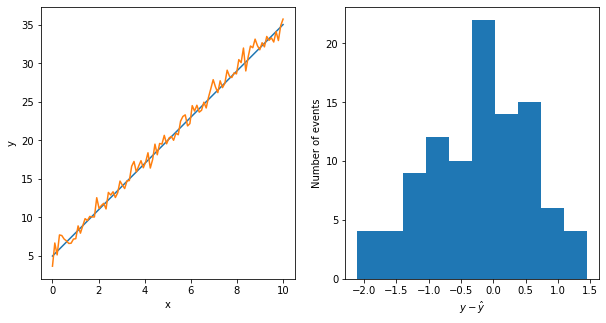

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].plot(df["x"],df["y"])
axes[0].plot(df["x"], df["y_noise"])
axes[1].hist(df["y"]-df["y_noise"])

axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[1].set_xlabel(r'$y - \hat{y}$')
axes[1].set_ylabel("Number of events");

## Algorytm równań normalnych
Proszę napisać funkcję ```normal_equations(x,y)``` która:
* na wejściu przyjmuje ciąg uczący $x,y$, implementuje wzór na parametry optymalne na podstawie [równań normalnych](http://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_1#Minimalizacja_funkcji_kosztu ). 
* funkcja powinna zwracać estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$
* funkcja powinna być przetestowana na czystych danych, czli parze $(x,y)$, a potem na danych zaszumionych $(x ,y_{noise}$)
* dla przypomnienia: odwrotność macierzy można obliczyć w numpy funkcją: <tt>numpy.linalg.inv</tt>
* proszę zwrócić uwagę, że konieczne jest użycie wektorów kolumnowych!

**Wskazówka:** aby skorzystać ze wzorów z wykładu, macierz wejść $X$ musi zawierać nie tylko kolumnę $x$, ale także kolumnę jedynek, aby przemnożona przez wektor [$\theta_0$ $\theta_1$] dawała odpowiedni wektor (kolumnowy) wyjść $y$.

In [ ]:
def normal_equations(x,y):
    
    x_expanded = np.column_stack((np.ones(x.shape[0]), x))
    a = np.dot( np.dot(np.linalg.inv( np.dot(np.transpose(x_expanded),x_expanded)  ),np.transpose(x_expanded)) ,y)
    
    print(x_expanded)
    theta = a
    return theta

theta_est = normal_equations(df["x"], df["y"])
theta_est_noise = normal_equations(df["x"],df["y_noise"])

print("prawdziwe wartości parametrów:", theta.T)
print("wartości estymowane za pomocą równań normalnych dla nominalnych danych:", theta_est.T)

[[ 1.          0.        ]
 [ 1.          0.1010101 ]
 [ 1.          0.2020202 ]
 [ 1.          0.3030303 ]
 [ 1.          0.4040404 ]
 [ 1.          0.50505051]
 [ 1.          0.60606061]
 [ 1.          0.70707071]
 [ 1.          0.80808081]
 [ 1.          0.90909091]
 [ 1.          1.01010101]
 [ 1.          1.11111111]
 [ 1.          1.21212121]
 [ 1.          1.31313131]
 [ 1.          1.41414141]
 [ 1.          1.51515152]
 [ 1.          1.61616162]
 [ 1.          1.71717172]
 [ 1.          1.81818182]
 [ 1.          1.91919192]
 [ 1.          2.02020202]
 [ 1.          2.12121212]
 [ 1.          2.22222222]
 [ 1.          2.32323232]
 [ 1.          2.42424242]
 [ 1.          2.52525253]
 [ 1.          2.62626263]
 [ 1.          2.72727273]
 [ 1.          2.82828283]
 [ 1.          2.92929293]
 [ 1.          3.03030303]
 [ 1.          3.13131313]
 [ 1.          3.23232323]
 [ 1.          3.33333333]
 [ 1.          3.43434343]
 [ 1.          3.53535354]
 [ 1.          3.63636364]
 

Korzystając z oszacowanych parametrów prostej proszę narysować:
* punkty dla danych zaszumionych
* linię prostą dopasowaną do danych szasumionych
* linię prostą dla nominalnych parametrów
* linię prostą dopasowaną do losowego ułamka próbki, wybranego z użyciem funkcji pandas.DataFrame.sample()

LinAlgError: ignored

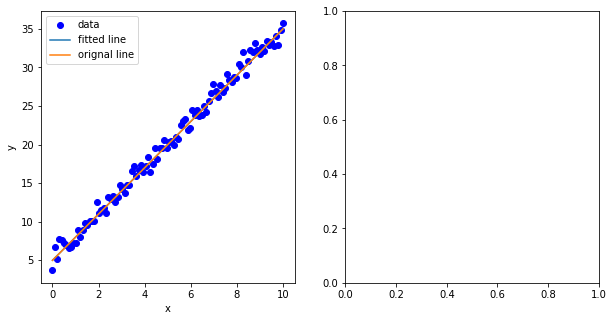

In [ ]:
theta_est_noise = normal_equations(df["x"],df["y_noise"])

#print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych:", theta_est.T)

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )
y_fit = np.sum(theta_est*x, axis=1)
y_original = np.sum(theta*x, axis=1)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].plot(df["x"], df["y_noise"], 'bo', label = "data");
axes[0].plot(df["x"], y_fit, label = "fitted line");
axes[0].plot(df["x"], y_original, label="orignal line");
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()

df_subsample = df.sample(frac=0.05)
x = df_subsample["x"]
y = df_subsample["y"]
x = np.column_stack((np.ones(x.shape[0]), x) )
theta_est = normal_equations(x, y)
y_fit = np.sum(theta_est*x, axis=1)
y_original = np.sum(theta*x, axis=1)
print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: {} \ndla podpróbki obejmującej 5% przypadków.".format(theta_est.T))


axes[1].plot(x, df_subsample["y"], 'bo', label = "data");
axes[1].plot(x, y_fit, label = "fitted line");
axes[1].plot(x, y_original, label="orignal line");
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].legend();

## Algorytm gradientowy stochastyczny 

Proszę napisać funkcję ```iterative_stochastic_gradient(x,y, theta, alpha, nIter)``` która:
* na wejściu przyjmuje ciąg uczący w postaci obiektu pandas. DataFrame, wartości początkowe $(\theta_{0}, \theta_{1})$, parametr szybkości zbiegania $\alpha$ oraz liczbę iteracji nIter
* implementuje wzór na parametry optymalne na podstawie [algorytmu najmniejszych kwadratów](https://kampus-student2.ckc.uw.edu.pl/mod/url/view.php?id=247878). 
* funkcja powinna zwracać estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ dla wszystkich iteracji, czyli zwracać tablicę o kształcie
 $(nIter+1, 2)$. Początkową wartość $(\theta_{0}^{est}, \theta_{1}^{est})$ także należy dołączyc, stąd nIter+1 elementów
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ równą nominalnej, oraz różnej od nominalnej

In [ ]:
%time

def iterative_stochastic_gradient(x, y, init_theta, alpha, nIter):
    
    theta = init_theta
    theta_est = np.copy(theta)
    theta_est = np.reshape(theta_est, (-1,2))
    x = df["x"]
    x = np.column_stack((np.ones(x.shape[0]), x) )
    y_fit = np.sum(theta_est*x, axis=1)
    y_original = np.sum(theta*x, axis=1)
    
    indices = np.random.randint(low=0, high=len(x)-1, size=(nIter))
    for iteration in range(nIter):
      
      i = np.random.randint(len(x))
      xx = x[i].reshape(2,1)
      h = np.dot(theta_est,xx)
      dJ= ( h - y[i]) * xx
      theta_est = theta_est - alpha * dJ 
        
    return theta_est   
        
          
theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta, 0.01, 1)    
print("Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta:",theta_est[-1])

theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta+2, 0.01, 500)    
print("Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta:",theta_est[-1])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta: [5. 3.]
Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta: [5. 3.]


Proszę narysować następujące rysunki:
* dane, oraz krzywe regressji dla wszyskich iteracji na jednym rysunku
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.1, 0.05 oraz 0.01 oraz 10 iteracji
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 dla 100 iteracji

W każdym przypadku jako wartości początkowe proszę przyjąć ($\theta_{0}$, $\theta_{1}$) + 1

Finalna wartość parametrów dla alpha=0.1, nIter = 10: 		 [5. 3.]
Finalna wartość parametrów dla alpha=0.05, nIter = 10: 		 [5. 3.]
Finalna wartość parametrów dla alpha=0.001, nIter = 10: 	 [5. 3.]
Finalna wartość parametrów dla alpha=0.001, nIter = 100: 	 [5. 3.]
Oryginalna wartośc parametrów: 				 [5 3]


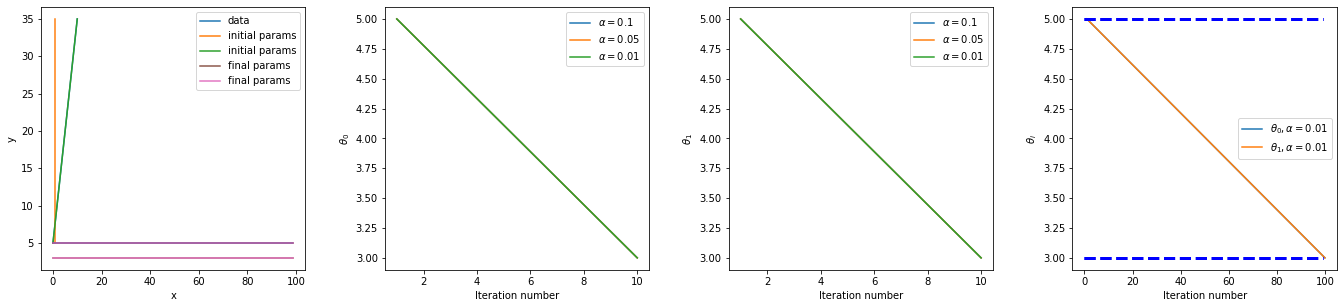

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,4, figsize=(20,5))

theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta, 0.01, 10)  

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )

axes[0].plot(df["x"], df["y"], label = "data");

y_fit = theta_est.dot(x.T)
y_fit = y_fit.T

axes[0].plot(x, df["y"], label = "initial params");
axes[0].plot(np.full_like(x,theta[0]));
axes[0].plot(np.full_like(x,theta[1]), label = "final params");
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend();

theta_alpha_01 = iterative_stochastic_gradient(df["x"], df["y"], theta, 0.1, 10) 
theta_alpha_005 = iterative_stochastic_gradient(df["x"], df["y"], theta, 0.05, 10) 
theta_alpha_001 = iterative_stochastic_gradient(df["x"], df["y"], theta, 0.01, 10)
theta_alpha = iterative_stochastic_gradient(df["x"], df["y"], theta, 0.01, 100)

axes[1].plot([1,10], theta_alpha_01[0], label = r'$\alpha = 0.1$');
axes[1].plot([1,10], theta_alpha_005[0], label = r'$\alpha = 0.05$');
axes[1].plot([1,10], theta_alpha_001[0], label = r'$\alpha = 0.01$');
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{0}$')
axes[1].legend();

axes[2].plot([1,10], theta_alpha_01[1], label = r'$\alpha = 0.1$');
axes[2].plot([1,10], theta_alpha_005[1], label = r'$\alpha = 0.05$');
axes[2].plot([1,10], theta_alpha_001[1], label = r'$\alpha = 0.01$');
axes[2].set_xlabel("Iteration number")
axes[2].set_ylabel(r'$\theta_{1}$')
axes[2].legend();

axes[3].plot([1,100], theta_alpha[0], label = r'$\theta_{0},  \alpha = 0.01$');
axes[3].plot([1,100], theta_alpha[1], label = r'$\theta_{1}, \alpha = 0.01$');
axes[3].plot(np.full_like(x,theta[0]),  "--b",linewidth=3.0);
axes[3].plot(np.full_like(x,theta[1]),  "--b",linewidth=3.0);
axes[3].set_xlabel("Iteration number")
axes[3].set_ylabel(r'$\theta_{i}$')
axes[3].legend();

print("Finalna wartość parametrów dla alpha=0.1, nIter = 10: \t\t",theta_alpha_01[-1])
print("Finalna wartość parametrów dla alpha=0.05, nIter = 10: \t\t",theta_alpha_005[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 10: \t",theta_alpha_001[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 100: \t",theta_alpha[-1])
print("Oryginalna wartośc parametrów: \t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Algorytm gradientowy zbiorczy

Proszę napisać funkcję ```iterative_batch_gradient(x,y, theta, alpha, nIter)``` która:
* na wejściu przyjmuje ciąg uczący w postaći obiektu pandas.DataFrame, wartości początkowe $(\theta_{0}, \theta_{1})$, parametr szybkości zbiegania $\alpha$ oraz liczbę iteracji nIter
* implementuje wzór na parametry optymalne na podstawie [algorytmu najmniejszych kwadratów](https://kampus-student2.ckc.uw.edu.pl/mod/url/view.php?id=247878). 
* funkcja powinna zwracać estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ dla wszystkich iteracji, czyli zwracać tablicę o kształcie
 $(nIter+1, 2)$. Początkową wartość $(\theta_{0}^{est}, \theta_{1}^{est})$ także należy dołączyc, stąd nIter+1 elementów
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ równą nominalnej, oraz różnej od nominalnej

In [ ]:
%time

def iterative_batch_gradient(x, y, init_theta, alpha, nIter):
    
    theta = init_theta
    theta_est = np.copy(theta)
    theta_est = np.reshape(theta_est, (-1,2))
    batchSize = len(x)
    for iteration in range(nIter):
        for i, j in enumerate(x):
          i = np.random.randint(len(x)) 
          xx = x[i]
          h = np.dot(theta_est,xx)
          dJ= ( h - y[i]) * xx  
        theta = theta_est - alpha * dJ
        theta_est = np.append(theta_est, theta, axis=0)
    return theta_est   
        
theta_est = iterative_batch_gradient(df["x"], df["y"], init_theta=theta, alpha=0.01, nIter=1)    
print("Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta:",theta_est[-1])

theta_est = iterative_batch_gradient(df["x"], df["y"], init_theta=theta+1, alpha=0.01, nIter=1)    
print("Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta:",theta_est[-1])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta: [3.92510968 3.43434343]
Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta: [5.43495562 3.98673605]


Proszę narysować następujące rysunki:
* dane, oraz krzywe regressji dla wszyskich iteracji na jednym rysunku
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.1, 0.05 oraz 0.01 oraz 10 iteracji
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 dla 100 iteracji

W każdym przypadku jako wartości początkowe proszę przyjąć ($\theta_{0}$, $\theta_{1}$) + 1

Finalna wartość parametrów dla alpha=0.1, nIter = 10: 		 [-167927.78223562  -34388.78183851]
Finalna wartość parametrów dla alpha=0.05, nIter = 10: 		 [2.2908116  2.38153356]
Finalna wartość parametrów dla alpha=0.001, nIter = 10: 	 [4.4936926 3.9402017]
Finalna wartość parametrów dla alpha=0.001, nIter = 100: 	 [3.83762796 3.83762796]
Oryginalna wartośc parametrów: 				 [5 3]


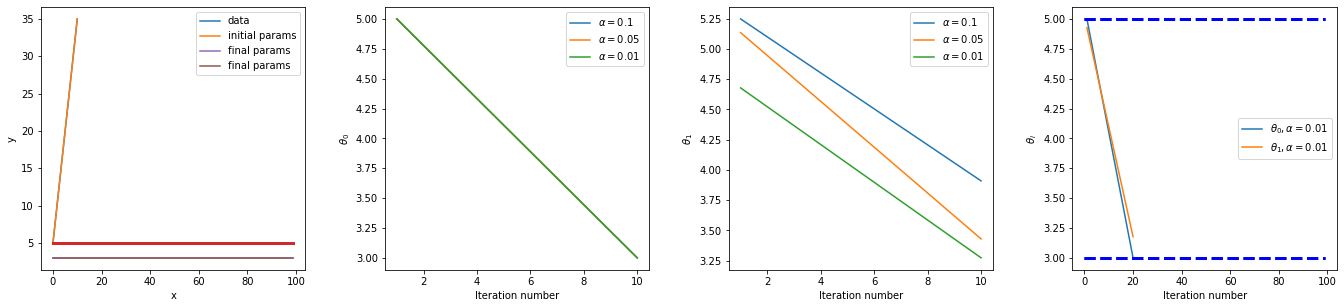

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,4, figsize=(20,5))

theta_est = iterative_batch_gradient(df["x"], df["y"], init_theta=theta, alpha=0.01, nIter=1)  

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )

axes[0].plot(df["x"], df["y"], label = "data");

y_fit = theta_est.dot(x.T)
y_fit = y_fit.T

axes[0].plot(df["x"], df["y"], label = "initial params");
axes[0].plot(np.full_like(x,theta[0]), linewidth=3.0);
axes[0].plot(np.full_like(x,theta[1]), label = "final params");

axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend();

theta_alpha_01 = iterative_batch_gradient(df["x"], df["y"], init_theta=theta, alpha=0.1, nIter=10) 
theta_alpha_005 = iterative_batch_gradient(df["x"], df["y"], init_theta=theta, alpha=0.05, nIter=10) 
theta_alpha_001 = iterative_batch_gradient(df["x"], df["y"], init_theta=theta, alpha=0.01, nIter=10)
theta_alpha = iterative_batch_gradient(df["x"], df["y"], init_theta=theta, alpha=0.01, nIter=20) 
#muszę robić mniej powtórzeń, bo colab krzyczy, że wykorzystuję za dużo RAMu i się zawiesza i rzuca błędami

axes[1].plot([1,10], theta_alpha_01[0], label = r'$\alpha = 0.1$');
axes[1].plot([1,10], theta_alpha_005[0], label = r'$\alpha = 0.05$');
axes[1].plot([1,10], theta_alpha_001[0], label = r'$\alpha = 0.01$');
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{0}$')
axes[1].legend();

axes[2].plot([1,10], theta_alpha_01[1], label = r'$\alpha = 0.1$');
axes[2].plot([1,10], theta_alpha_005[1], label = r'$\alpha = 0.05$');
axes[2].plot([1,10], theta_alpha_001[1], label = r'$\alpha = 0.01$');
axes[2].set_xlabel("Iteration number")
axes[2].set_ylabel(r'$\theta_{1}$')
axes[2].legend();

axes[3].plot([1,20], theta_alpha[0], label = r'$\theta_{0},  \alpha = 0.01$');
axes[3].plot([1,20], theta_alpha[1], label = r'$\theta_{1}, \alpha = 0.01$');
axes[3].plot(np.full_like(x,theta[0]),  "--b",linewidth=3.0);
axes[3].plot(np.full_like(x,theta[1]),  "--b",linewidth=3.0);
axes[3].set_xlabel("Iteration number")
axes[3].set_ylabel(r'$\theta_{i}$')
axes[3].legend();

print("Finalna wartość parametrów dla alpha=0.1, nIter = 10: \t\t",theta_alpha_01[-1])
print("Finalna wartość parametrów dla alpha=0.05, nIter = 10: \t\t",theta_alpha_005[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 10: \t",theta_alpha_001[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 100: \t",theta_alpha[-1])
print("Oryginalna wartośc parametrów: \t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Porównanie algorytmów
Proszę sprawdzić czy algorytmy optymalizacyjne działają poprawnie dla danych gdzie błąd podlega innym rozkładom prawdopodobieństwa niż normalny:

* dla rozkładu jednorodnego w zakrtesie [-1,1[
* dla rozkłatu t-Studenta o trzech stopniach swobody

Dla wszystkch trzech rozkładów proszę narysować wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 i 100 iteracji.

In [ ]:
df["y_flat_noise"] = df["y"] + -1 + 2*np.random.random(nPoints)
df["y_tStudent_noise"] = df["y"] + np.random.standard_t(df=3, size=nPoints)
print(df)

           x          y    y_noise  y_flat_noise  y_tStudent_noise
0    0.00000   5.000000   3.497764      4.926447          5.744018
1    0.10101   5.303030   5.849806      6.294384          4.163465
2    0.20202   5.606061   5.083001      5.240520          2.615396
3    0.30303   5.909091   6.030759      5.452566          6.149154
4    0.40404   6.212121   6.405157      5.755958          5.324633
..       ...        ...        ...           ...               ...
95   9.59596  33.787879  32.415722     34.414965         33.983299
96   9.69697  34.090909  34.603507     33.255795         35.129155
97   9.79798  34.393939  35.003253     34.270186         35.089331
98   9.89899  34.696970  34.452366     35.080952         35.491821
99  10.00000  35.000000  36.490710     35.057540         35.101796

[100 rows x 5 columns]


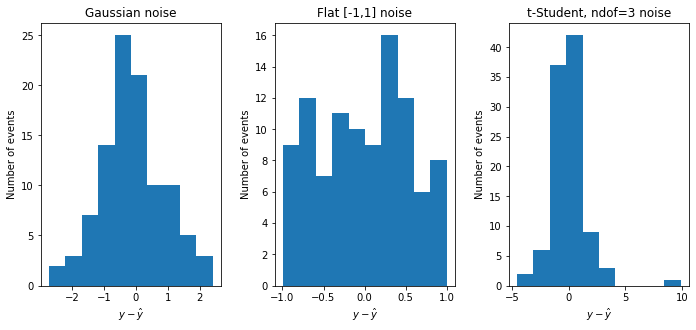

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3, figsize=(10,5))

axes[0].hist(df["y"] - df["y_noise"]);
axes[1].hist(df["y"] - df["y_flat_noise"]);
axes[2].hist(df["y"] - df["y_tStudent_noise"]);

axes[0].set_title("Gaussian noise")
axes[0].set_xlabel(r'$y - \hat{y}$')
axes[0].set_ylabel("Number of events");

axes[1].set_title("Flat [-1,1] noise")
axes[1].set_xlabel(r'$y - \hat{y}$')
axes[1].set_ylabel("Number of events");

axes[2].set_title("t-Student, ndof=3 noise")
axes[2].set_xlabel(r'$y - \hat{y}$')
axes[2].set_ylabel("Number of events");

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 5.72 µs
Finalna wartość parametrów dla szumu gaussowskiego, nIter = 100: 	 [3.81318894 3.81318894]
Finalna wartość parametrów dla szumu płaskiego, nIter = 100: 		 [4.00635593 4.00595577]
Finalna wartość parametrów dla szumu tStudenta, nIter = 100: 		 [3.93925849 3.93852166]
Oryginalna wartośc parametrów: 					 [5 3]


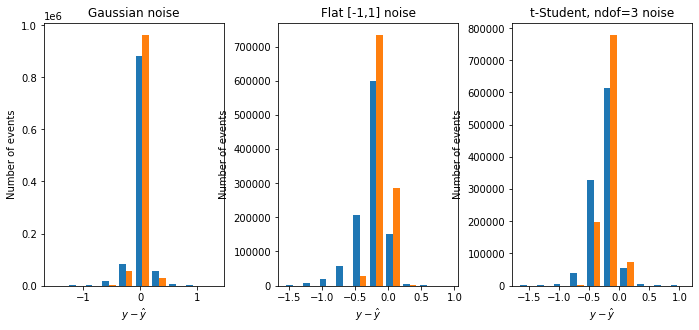

In [ ]:
%time
#tu też robię na mniejszych liczbach (20 zamiast 100)
theta_gaussian_noise = iterative_batch_gradient(df["x"], df["y_noise"], init_theta=theta, alpha=0.01, nIter=20)  
theta_flat_noise = iterative_batch_gradient(df["x"], df["y_flat_noise"], init_theta=theta, alpha=0.01, nIter=20)  
theta_tStudent_noise = iterative_batch_gradient(df["x"], df["y_tStudent_noise"], init_theta=theta, alpha=0.01, nIter=20)  

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3, figsize=(10,5))

axes[0].hist(theta_alpha - theta_gaussian_noise);
axes[1].hist(theta_alpha - theta_flat_noise);
axes[2].hist(theta_alpha - theta_tStudent_noise);

axes[0].set_title("Gaussian noise")
axes[0].set_xlabel(r'$y - \hat{y}$')
axes[0].set_ylabel("Number of events");

axes[1].set_title("Flat [-1,1] noise")
axes[1].set_xlabel(r'$y - \hat{y}$')
axes[1].set_ylabel("Number of events");

axes[2].set_title("t-Student, ndof=3 noise")
axes[2].set_xlabel(r'$y - \hat{y}$')
axes[2].set_ylabel("Number of events");

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

print("Finalna wartość parametrów dla szumu gaussowskiego, nIter = 100: \t",theta_gaussian_noise[-1])
print("Finalna wartość parametrów dla szumu płaskiego, nIter = 100: \t\t",theta_flat_noise[-1])
print("Finalna wartość parametrów dla szumu tStudenta, nIter = 100: \t\t",theta_tStudent_noise[-1])
print("Oryginalna wartośc parametrów: \t\t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)